In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

Kerasには複数のRecurrentレイヤーや、それに関連したクラスが用意されています。今回のSprintではこれら全てを動かした上で、それぞれの役割を説明できる状態を目指します。


以下のドキュメントにまとめられています。


Recurrentレイヤー - Keras Documentation

RNN (Recurrent Neural Network) は、1ステップ前の出力を自身の入力として与えることで、過去の情報を利用できる。
RNNでは長期間のデータを扱えないため、GRU (Gated Recurrent Unit) やLSTM (Long Short Term Memory) が使われる
GRUとLSTMは、RNNを改良したレイヤであり、より長期間のデータの依存関係を学習できる。
GRUはLSTMに比べて学習パラメータが少なく、計算時間が短い特徴

【問題1】各種手法の実行
Kerasには4種類のReccurentレイヤーが用意されています。SimpleRNN以外はゲート付きリカレントニューラルネットワークです。


SimpleRNN  
GRU  
LSTM  
ConvLSTM2D  


これらを実行してください。この中でSimpleRNN、GRU、LSTMは同様のタスクに用いることができるため、精度の比較も行なってください。


Keras公式のサンプルコードを利用してください。


LSTMのサンプルコード


keras/imdb_lstm.py at master · keras-team/keras


ConvLSTM2Dのサンプルコード


keras/conv_lstm.py at master · keras-team/keras


このサンプルコードをそのまま使う必要はなく、ノード数やエポックなどは変更して構いません。全て実行する上での実行時間を考慮した数に設定してください。


In [7]:

from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb



SimpleRNN

In [8]:
max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

Loading data...
25000 train sequences
25000 test sequences


In [9]:
print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)


In [13]:
print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

Build model...


In [14]:
# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=3,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 144s 6ms/step - loss: 0.4602 - accuracy: 0.7820 - val_loss: 0.3976 - val_accuracy: 0.8258
Epoch 2/3
25000/25000 [==============================] - 165s 7ms/step - loss: 0.2989 - accuracy: 0.8786 - val_loss: 0.3829 - val_accuracy: 0.8283
Epoch 3/3
25000/25000 [==============================] - 33s 1ms/step
Test score: 0.40809936384677886
Test accuracy: 0.8334000110626221


GRU

In [15]:
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense , Embedding
from keras.layers import GRU
from keras.datasets import imdb

max_features = 20000
maxlen = 80
batch_size = 32

print("Loading data...")
(X_train , y_train) , (X_test , y_test) = imdb.load_data(num_words = max_features)
print(len(X_train) , "train sequences")
print(len(X_test) , "test , sequences")

Loading data...
25000 train sequences
25000 test , sequences


In [16]:
print("Pad sequences (samples X time)")
X_train = sequence.pad_sequences(X_train , maxlen=maxlen)
X_test = sequence.pad_sequences(X_test , maxlen=maxlen)
print("X_train shape : " , X_train.shape)
print("X_test shape : " , X_test.shape)

print("Build model...")
model = Sequential()
model.add(Embedding(max_features , 128))
model.add(GRU(128 , dropout=0.2 , recurrent_dropout=0.2))
model.add(Dense(1 , activation="sigmoid"))

print(model.summary())

Pad sequences (samples X time)
X_train shape :  (25000, 80)
X_test shape :  (25000, 80)
Build model...
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 128)         2560000   
_________________________________________________________________
gru_1 (GRU)                  (None, 128)               98688     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 2,658,817
Trainable params: 2,658,817
Non-trainable params: 0
_________________________________________________________________
None


In [18]:
model.compile(loss="binary_crossentropy" , 
             optimizer="adam" , 
             metrics=["accuracy"])

print("Train...")
model.fit(X_train , y_train , 
         batch_size=batch_size , 
         epochs = 3 , 
         validation_data = (X_test , y_test))
score , acc = model.evaluate(X_test , y_test  , 
                            batch_size=batch_size)
print("Test score : " , score)
print("Test accuracy : " , acc)

Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 144s 6ms/step - loss: 0.4897 - accuracy: 0.7651 - val_loss: 0.5242 - val_accuracy: 0.7418
Epoch 2/3
25000/25000 [==============================] - 150s 6ms/step - loss: 3.5136 - accuracy: 0.7900 - val_loss: 0.5797 - val_accuracy: 0.6859
Epoch 3/3
25000/25000 [==============================] - 23s 902us/step
Test score :  0.5766544809341431
Test accuracy :  0.6966400146484375


LSTM

In [19]:
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense , Embedding
from keras.layers import LSTM
from keras.datasets import imdb

max_features = 20000
maxlen = 80
batch_size = 48

print("Loading data...")
(X_train , y_train) , (X_test , y_test) = imdb.load_data(num_words = max_features)
print(len(X_train) , "train sequences")
print(len(X_test) , "test , sequences")


Loading data...
25000 train sequences
25000 test , sequences


In [20]:
print("Pad sequences (samples X time)")
X_train = sequence.pad_sequences(X_train , maxlen=maxlen)
X_test = sequence.pad_sequences(X_test , maxlen=maxlen)
print("X_train shape : " , X_train.shape)
print("X_test shape : " , X_test.shape)

print("Build model...")
model = Sequential()
model.add(Embedding(max_features , 128))
model.add(LSTM(128 , dropout=0.2 , recurrent_dropout=0.2))
model.add(Dense(50 , activation="sigmoid"))
model.add(Dense(1 , activation="sigmoid"))

print(model.summary())

Pad sequences (samples X time)
X_train shape :  (25000, 80)
X_test shape :  (25000, 80)
Build model...
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 128)         2560000   
_________________________________________________________________
lstm_3 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_4 (Dense)              (None, 50)                6450      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 51        
Total params: 2,698,085
Trainable params: 2,698,085
Non-trainable params: 0
_________________________________________________________________
None


In [21]:
model.compile(loss="binary_crossentropy" , 
             optimizer="adam" , 
             metrics=["accuracy"])

print("Train...")
model.fit(X_train , y_train , 
         batch_size=batch_size , 
         epochs = 3, 
         validation_data = (X_test , y_test))
score , acc = model.evaluate(X_test , y_test  , 
                            batch_size=batch_size)
print("Test score : " , score)
print("Test accuracy : " , acc)

Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 142s 6ms/step - loss: 0.4687 - accuracy: 0.7727 - val_loss: 0.3983 - val_accuracy: 0.8293
Epoch 2/3
25000/25000 [==============================] - 128s 5ms/step - loss: 0.3040 - accuracy: 0.8790 - val_loss: 0.3772 - val_accuracy: 0.8342
Epoch 3/3
25000/25000 [==============================] - 21s 846us/step
Test score :  0.4084657478141785
Test accuracy :  0.8270400166511536


ConvLSTM2D

In [22]:

from keras.models import Sequential
from keras.layers.convolutional import Conv3D
from keras.layers.convolutional_recurrent import ConvLSTM2D
from keras.layers.normalization import BatchNormalization
import numpy as np
import pylab as plt

In [23]:
seq = Sequential()
seq.add(ConvLSTM2D(filters=40 , kernel_size=(3,3) , 
                  input_shape=(None , 40 , 40 , 1) , 
                  padding="same" , return_sequences=True))

seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40 , kernel_size=(3,3) , 
                  padding="same" , return_sequences=True))

seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40 , kernel_size=(3,3) , 
                  padding="same" , return_sequences=True))

seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40 , kernel_size=(3,3) , 
                  padding="same" , return_sequences=True))

seq.add(BatchNormalization())

seq.add(Conv3D(filters=1 , kernel_size=(3,3,3) , 
              activation="sigmoid" ,
              padding="same" , data_format="channels_last"))

seq.compile(loss="binary_crossentropy" , optimizer="adadelta")

print(seq.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d_1 (ConvLSTM2D)  (None, None, 40, 40, 40)  59200     
_________________________________________________________________
batch_normalization_1 (Batch (None, None, 40, 40, 40)  160       
_________________________________________________________________
conv_lst_m2d_2 (ConvLSTM2D)  (None, None, 40, 40, 40)  115360    
_________________________________________________________________
batch_normalization_2 (Batch (None, None, 40, 40, 40)  160       
_________________________________________________________________
conv_lst_m2d_3 (ConvLSTM2D)  (None, None, 40, 40, 40)  115360    
_________________________________________________________________
batch_normalization_3 (Batch (None, None, 40, 40, 40)  160       
_________________________________________________________________
conv_lst_m2d_4 (ConvLSTM2D)  (None, None, 40, 40, 40) 

In [24]:
def generate_movies(n_samples=1200, n_frames=15):
    row = 80
    col = 80
    noisy_movies = np.zeros((n_samples, n_frames, row, col, 1), dtype=np.float)
    shifted_movies = np.zeros((n_samples, n_frames, row, col, 1),
                              dtype=np.float)

    for i in range(n_samples):
        # Add 3 to 7 moving squares
        n = np.random.randint(3, 8)

        for j in range(n):
            # Initial position
            xstart = np.random.randint(20, 60)
            ystart = np.random.randint(20, 60)
            # Direction of motion
            directionx = np.random.randint(0, 3) - 1
            directiony = np.random.randint(0, 3) - 1

            # Size of the square
            w = np.random.randint(2, 4)

            for t in range(n_frames):
                x_shift = xstart + directionx * t
                y_shift = ystart + directiony * t
                noisy_movies[i, t, x_shift - w: x_shift + w,
                             y_shift - w: y_shift + w, 0] += 1

                # Make it more robust by adding noise.
                # The idea is that if during inference,
                # the value of the pixel is not exactly one,
                # we need to train the network to be robust and still
                # consider it as a pixel belonging to a square.
                if np.random.randint(0, 2):
                    noise_f = (-1)**np.random.randint(0, 2)
                    noisy_movies[i, t,
                                 x_shift - w - 1: x_shift + w + 1,
                                 y_shift - w - 1: y_shift + w + 1,
                                 0] += noise_f * 0.1

                # Shift the ground truth by 1
                x_shift = xstart + directionx * (t + 1)
                y_shift = ystart + directiony * (t + 1)
                shifted_movies[i, t, x_shift - w: x_shift + w,
                               y_shift - w: y_shift + w, 0] += 1

    # Cut to a 40x40 window
    noisy_movies = noisy_movies[::, ::, 20:60, 20:60, ::]
    shifted_movies = shifted_movies[::, ::, 20:60, 20:60, ::]
    noisy_movies[noisy_movies >= 1] = 1
    shifted_movies[shifted_movies >= 1] = 1
    return noisy_movies, shifted_movies

In [25]:
noisy_movies , shifted_movies = generate_movies(n_samples=1200)
seq.fit(noisy_movies[:100] , shifted_movies[:100] , batch_size=20 , 
       epochs = 5 , validation_split=0.2)

Train on 80 samples, validate on 20 samples
Epoch 1/5
80/80 [==============================] - 153s 2s/step - loss: 0.9554 - val_loss: 0.6803
Epoch 2/5
80/80 [==============================] - 166s 2s/step - loss: 0.7051 - val_loss: 0.6729
Epoch 3/5
80/80 [==============================] - 190s 2s/step - loss: 0.5630 - val_loss: 0.6646
Epoch 4/5
80/80 [==============================] - 165s 2s/step - loss: 0.4626 - val_loss: 0.6553
Epoch 5/5
80/80 [==============================] - 165s 2s/step - loss: 0.4231 - val_loss: 0.6455


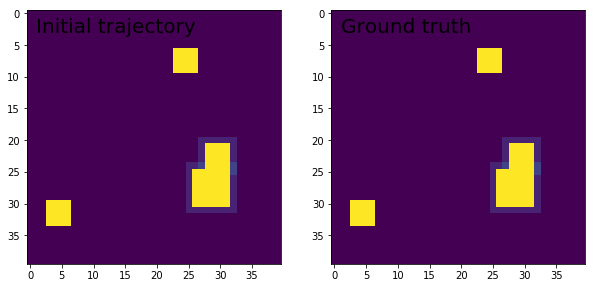

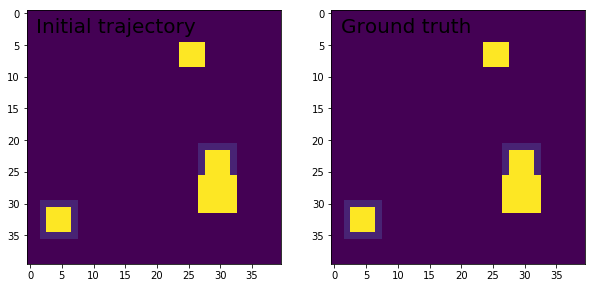

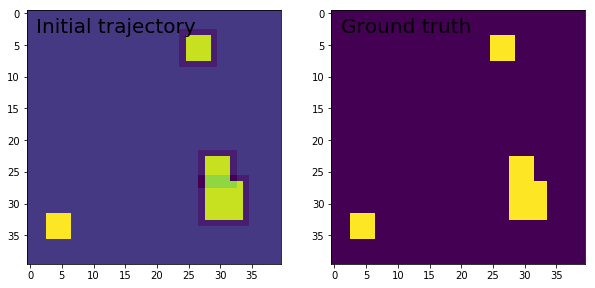

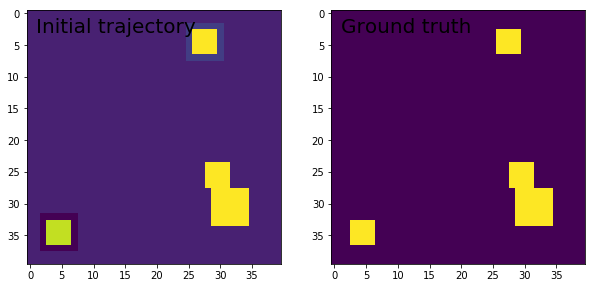

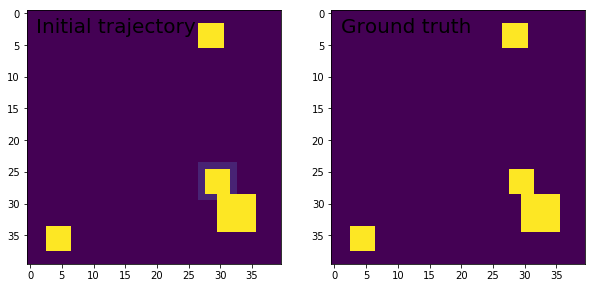

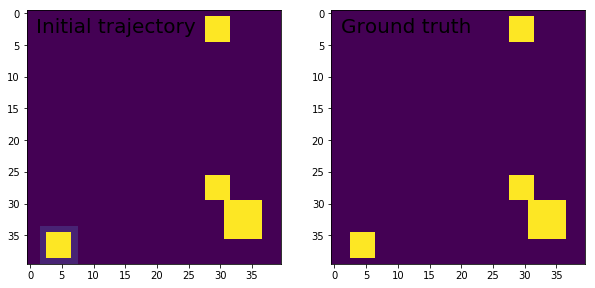

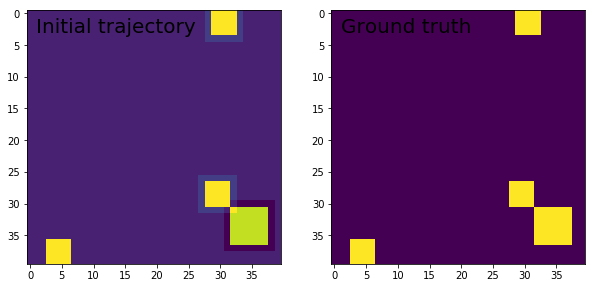

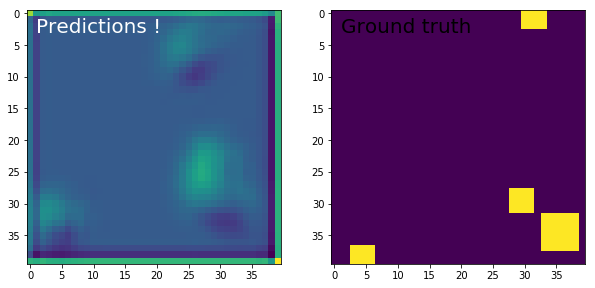

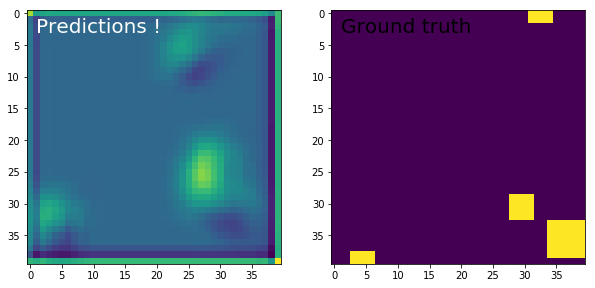

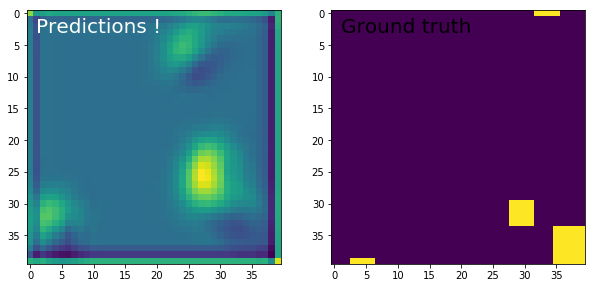

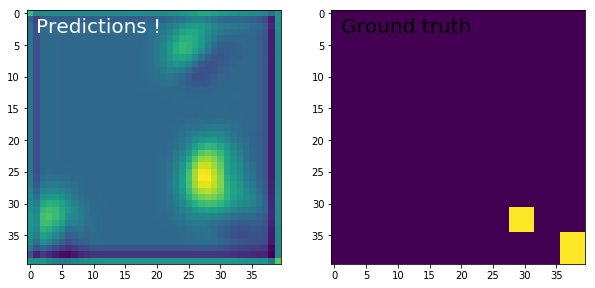

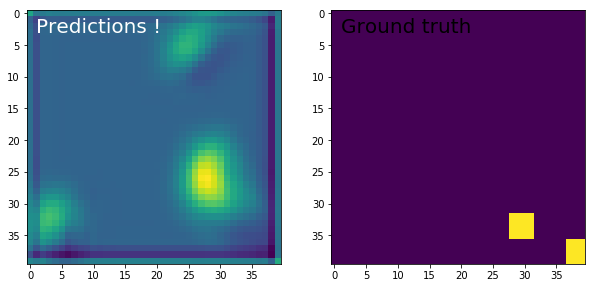

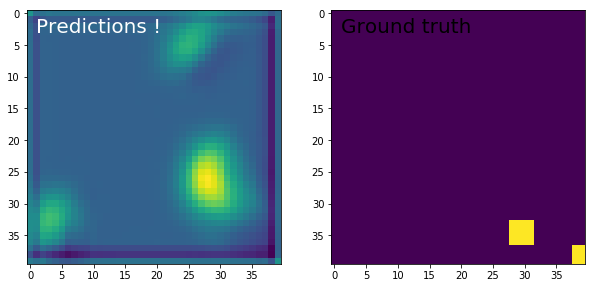

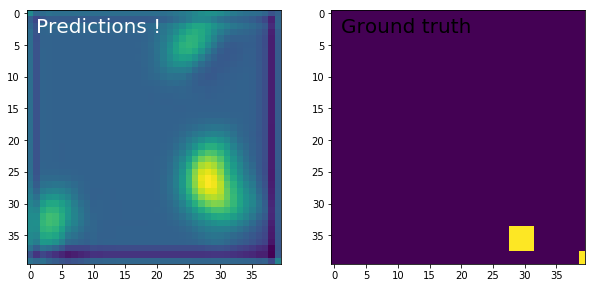

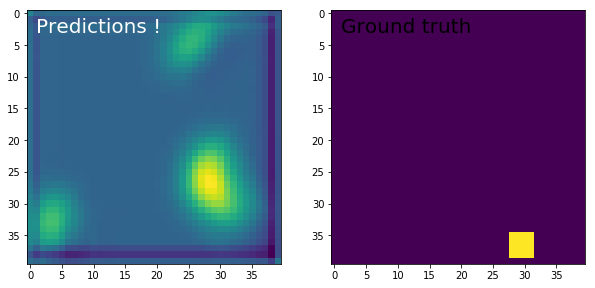

In [26]:
# Testing the network on one movie
# feed it with the first 7 positions and then
# predict the new positions
which = 1004
track = noisy_movies[which][:7, ::, ::, ::]

for j in range(16):
    new_pos = seq.predict(track[np.newaxis, ::, ::, ::, ::])
    new = new_pos[::, -1, ::, ::, ::]
    track = np.concatenate((track, new), axis=0)


# And then compare the predictions
# to the ground truth
track2 = noisy_movies[which][::, ::, ::, ::]
for i in range(15):
    fig = plt.figure(figsize=(10, 5))

    ax = fig.add_subplot(121)

    if i >= 7:
        ax.text(1, 3, 'Predictions !', fontsize=20, color='w')
    else:
        ax.text(1, 3, 'Initial trajectory', fontsize=20)

    toplot = track[i, ::, ::, 0]

    plt.imshow(toplot)
    ax = fig.add_subplot(122)
    plt.text(1, 3, 'Ground truth', fontsize=20)

    toplot = track2[i, ::, ::, 0]
    if i >= 2:
        toplot = shifted_movies[which][i - 1, ::, ::, 0]

    plt.imshow(toplot)
    plt.savefig('%i_animate.png' % (i + 1))

【問題3】他のクラスの説明
ドキュメントには他にも関連するクラスが記載されています。それらがどういうものなのかを説明してください。この中には実際に扱うことは少ないクラスも含まれています。


RNN  
SimpleRNNCell  
GRUCell  
LSTMCell  
StackedRNNCells  
CuDNNGRU  
CuDNNLSTM  



RNN（Recurrent Neural Network）： 時系列データに対応したニューラルネットワークです。時系列のデータポイントは、各層の入力として利用されます。

SimpleRNNのCell：SimpleRNNとは、ある時点の状態を次の状態の入力値として扱うことができるループ構造を持ったニューラルネットワークです。
https://github.com/keras-team/keras/blob/master/keras/layers/recurrent.py#L782

GRUCell：GRUとはLSTMのゲートを使用するというコンセプトはそのままで、パラメータを削減し、計算時間を短縮でき。GRUCellはその隠れ層の１単位で、Tensolfrowにおいてクラスの形で提供されている。

https://github.com/keras-team/keras/blob/master/keras/layers/recurrent.py#L1154

LSTMCell：LSTMはゲートと呼ばれる仕組みが加わり、そのゲートにより時系列データの長期的な依存関係を学習することができる LSTMCellはその隠れ層の１単位で、Tensolfrowにおいてクラスの形で提供されている。

https://github.com/keras-team/keras/blob/master/keras/layers/recurrent.py#L1728

StackedRNNCells：RNN cellのスタックの振る舞いを単一のcellのようにするためのラッパー

https://github.com/keras-team/keras/blob/master/keras/layers/recurrent.py#L25

CuDNNGRU：CuDNNを利用した高速なGRU実装です。

https://github.com/keras-team/keras/blob/master/keras/layers/cudnn_recurrent.py#L135

CuDNNLSTM：CuDNNを利用した高速なLSTM実装です。
https://github.com/keras-team/keras/blob/master/keras/layers/cudnn_recurrent.py#L324
